<a href="https://colab.research.google.com/github/dinnysriramcharan/Machine-learning/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Calories Burnt Prediction**

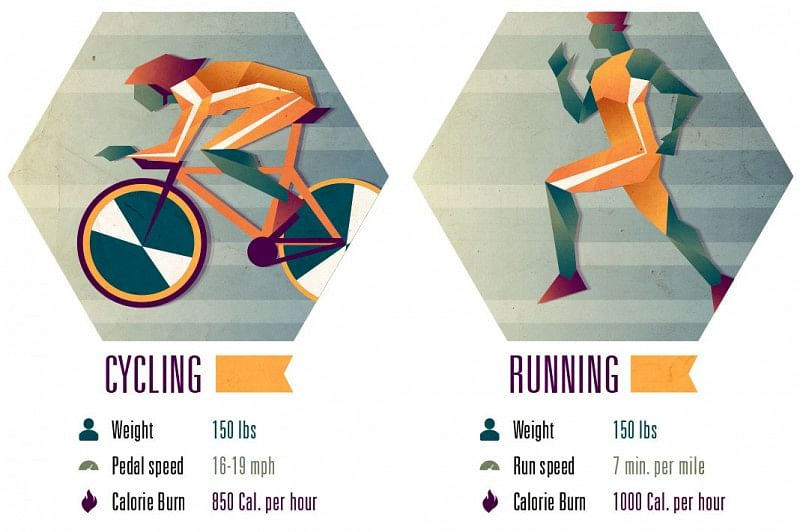

##This model is about Calories burnt prediction using Machine Learning with Python. For this prediction, I have used Linear Regression model.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Collection & Processing

In [2]:
exercise=pd.read_csv("exercise.csv")
calories=pd.read_csv("calories.csv")

In [3]:
print(exercise.shape)
exercise.head(10)

(15000, 8)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


In [4]:
print(calories.shape)
calories.head(10)

(15000, 2)


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [5]:
calories_data = pd.concat([exercise, calories['Calories']], axis="columns")
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
calories_data=calories_data.drop(columns=["User_ID"])

### Data Analysis

In [7]:
calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


### Data Visualization

In [9]:
sns.set()

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

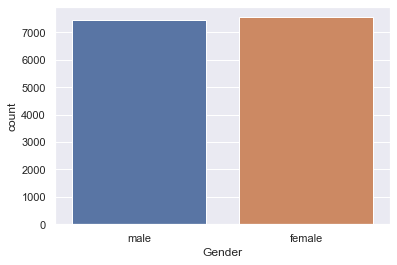

In [10]:
sns.countplot(calories_data['Gender'])

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

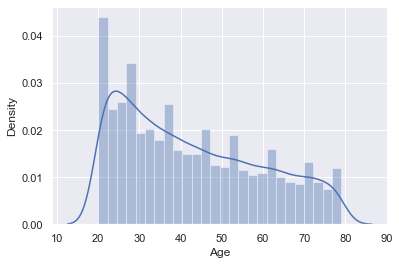

In [11]:
sns.distplot(calories_data['Age'])

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

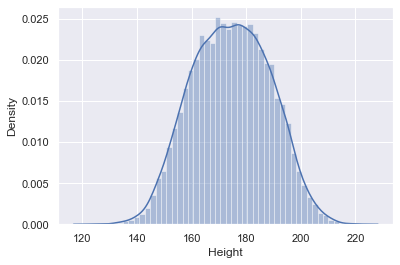

In [12]:
sns.distplot(calories_data['Height'])

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

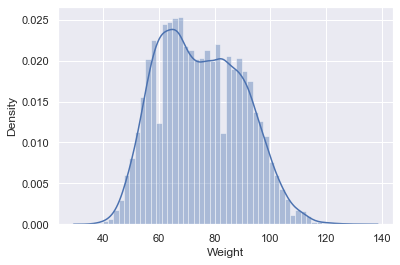

In [13]:
sns.distplot(calories_data['Weight'])

### spliting data

In [14]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
#calories_data.head()

In [15]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  int64  
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 937.6 KB


In [16]:
X = calories_data.drop(columns=['Calories'], axis=1)
Y = calories_data['Calories']

In [17]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [18]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [20]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(12000, 7) (3000, 7)
(12000,) (3000,)


### Model Training

In [21]:
model=LinearRegression()

In [22]:
model.fit(X_train,Y_train)

LinearRegression()

### Model accuracy

In [23]:
model.score(X_test,Y_test)

0.9645972794556343

In [24]:
import joblib
joblib.dump(model,"calories_model.sav")

['calories_model.sav']

### Prediction

In [ ]:
gender=int(input("enter gender\n if male enter:0 \n if female enter:1\n"))
age= int(input("enter your age in years : "))
height=float(input("enter your height in cm : "))
weight=float(input("enter your weight in kgs : "))
duration=float(input("enter duration of your workout in minutes : "))
heartrate=float(input("enter heart rate : "))
temp=float(input("enter your temperature in celsius : "))

enter gender
 if male enter:0 
 if female enter:1
0
enter your age in years : 68
enter your height in cm : 190
enter your weight in kgs : 94
enter duration of your workout in minutes : 29
enter heart rate : 98
enter your temperature in celsius : 40


In [ ]:
recieve=[gender,age,height,weight,duration,heartrate,temp]

In [ ]:
ans=model.predict([recieve])
print("calories burnt are {} cal.".format(ans[0]))

calories burnt are 199.16524557352727 cal.
